In [1]:
from utils import ParticleVisualizer, CamsERA5, load_config, clean_directory

In [2]:

config = load_config(file_path="config.yaml")
query = config["cams_request"]

client = CamsERA5()
client.get_data(query=query)
client.download(filename="CAMS")
ds = client.process()
ds

2024-07-10 13:26:02.060 | INFO     | utils:__init__:160 - Successfully logged on to Atmosphere Data Store
2024-07-10 13:26:02,187 INFO Welcome to the CDS
2024-07-10 13:26:02,190 INFO Sending request to https://ads.atmosphere.copernicus.eu/api/v2/resources/cams-europe-air-quality-reanalyses


2024-07-10 13:26:02,308 INFO Request is completed
2024-07-10 13:26:02.309 | INFO     | utils:wrapper:33 - get_data ran in 0.24834656715393066 seconds
2024-07-10 13:26:02,310 INFO Downloading https://download-0002-ads-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-cams-europe-air-quality-reanalyses-b586e659-b158-4c13-b0b0-fb5fdf5fdae2.zip to CAMS-2024-07-10_13-26-02.zip (669.3M)
2024-07-10 13:26:19,079 INFO Download rate 39.9M/s 
2024-07-10 13:26:19.080 | INFO     | utils:wrapper:33 - download ran in 16.770707845687866 seconds
2024-07-10 13:26:24.377 | INFO     | utils:wrapper:33 - process ran in 5.294130325317383 seconds


Extracted to file: CAMS\cams.eaq.ira.ENSa.pm10.l0.2023-01.nc


<xarray.Dataset> Size: 875MB
Dimensions:  (time: 744, lon: 700, lat: 420)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2023-01-01 ... 2023-01-31T23:00:00
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 44.75 44.85 44.95
  * lat      (lat) float64 3kB 30.05 30.15 30.25 30.35 ... 71.75 71.85 71.95
Data variables:
    pm10     (time, lat, lon) float32 875MB ...
Attributes:
    Conventions:  CF-1.7
    Title:        CAMS European air quality interim reanalysis
    Provider:     COPERNICUS European air quality service
    Production:   COPERNICUS Atmosphere Monitoring Service

In [3]:
ds

<xarray.Dataset> Size: 875MB
Dimensions:  (time: 744, lon: 700, lat: 420)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2023-01-01 ... 2023-01-31T23:00:00
  * lon      (lon) float64 6kB -24.95 -24.85 -24.75 -24.65 ... 44.75 44.85 44.95
  * lat      (lat) float64 3kB 30.05 30.15 30.25 30.35 ... 71.75 71.85 71.95
Data variables:
    pm10     (time, lat, lon) float32 875MB ...
Attributes:
    Conventions:  CF-1.7
    Title:        CAMS European air quality interim reanalysis
    Provider:     COPERNICUS European air quality service
    Production:   COPERNICUS Atmosphere Monitoring Service

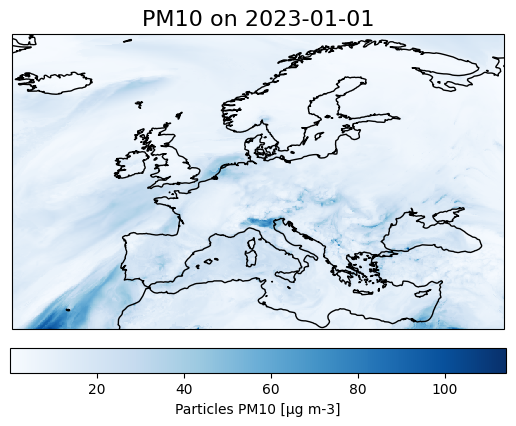

2024-07-10 13:32:51.786 | INFO     | utils:wrapper:33 - generate_animation ran in 386.3050606250763 seconds


In [4]:
ParticleVisualizer.plot_pm10_concentration(ds.pm10.sel(time=ds.time[0]))
pm10_anim = ParticleVisualizer.generate_animation(ds)

clean_directory()

In [5]:
pm10_anim